In [258]:
#Jai Ganesh Deva

### <u> Churn Modelling Dataset </u>

The churn rate is the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period. For a company to expand its clientele, its growth rate, as measured by the number of new customers, must exceed its churn rate. This rate is generally expressed as a percentage.


<img src="https://www.livechatinc.com/wp-content/uploads/2016/04/customer-churn.jpg">



- RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard
- IsActiveMember,EstimatedSalary Predictors
- Exited - Response Variable

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
os.chdir("C:\\Users\\vamsi\\Desktop")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Dense, Dropout
from tensorflow.contrib.keras import backend
plt.style.use('dark_background')



In [260]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [261]:
sns.set_style("darkgrid")

In [262]:
df = pd.read_csv("Churn_Modelling.csv")

In [263]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [264]:
X = df.iloc[:, 3:13].values

In [265]:
y = df.iloc[:, 13].values

In [266]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [267]:
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [268]:
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [270]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <i><u>Deep Learning Model</i></u>

In [271]:
classifier = Sequential()
classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=11))
classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [272]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [273]:
classifier.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 88us/step - loss: 8.8450 - acc: 0.3366 - val_loss: 7.8668 - val_acc: 0.3919
Epoch 2/100
6400/6400 [==============================] - 0s 32us/step - loss: 3.8188 - acc: 0.6105 - val_loss: 0.5855 - val_acc: 0.8006
Epoch 3/100
6400/6400 [==============================] - 0s 36us/step - loss: 0.5425 - acc: 0.7942 - val_loss: 0.5017 - val_acc: 0.7969
Epoch 4/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.4996 - acc: 0.7964 - val_loss: 0.5276 - val_acc: 0.8050
Epoch 5/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4878 - acc: 0.7981 - val_loss: 0.4737 - val_acc: 0.8025
Epoch 6/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4742 - acc: 0.8044 - val_loss: 0.4713 - val_acc: 0.8063
Epoch 7/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4763 - acc: 0.7997 - val_loss: 0.4950 - val_acc: 0.8081


6400/6400 [==============================] - 0s 33us/step - loss: 0.3459 - acc: 0.8592 - val_loss: 0.3648 - val_acc: 0.8456
Epoch 61/100
6400/6400 [==============================] - 0s 29us/step - loss: 0.3407 - acc: 0.8623 - val_loss: 0.3756 - val_acc: 0.8481
Epoch 62/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.3356 - acc: 0.8622 - val_loss: 0.3614 - val_acc: 0.8488
Epoch 63/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.3358 - acc: 0.8642 - val_loss: 0.3747 - val_acc: 0.8488
Epoch 64/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3316 - acc: 0.8644 - val_loss: 0.3653 - val_acc: 0.8512
Epoch 65/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.3356 - acc: 0.8642 - val_loss: 0.3633 - val_acc: 0.8519
Epoch 66/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.3357 - acc: 0.8609 - val_loss: 0.3614 - val_acc: 0.8519
Epoch 67/100
6400/6400 [==============================

In [274]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(accuracy_score(y_test,y_pred))
backend.clear_session()

[[1462  133]
 [ 170  235]]
0.8485


### <i><u>Optimizing neural networks</i></u>

In [275]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### <i><u>Optimizer </i></u>

In [276]:
def simple_nn(optim = "adam"):
    
    classifier = Sequential()
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=11))
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    
    classifier.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)
    
    

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 95us/step - loss: 8.7815 - acc: 0.3452 - val_loss: 7.9040 - val_acc: 0.3894
Epoch 2/100
6400/6400 [==============================] - 0s 41us/step - loss: 5.3119 - acc: 0.5269 - val_loss: 0.5806 - val_acc: 0.7894
Epoch 3/100
6400/6400 [==============================] - 0s 36us/step - loss: 0.5395 - acc: 0.7908 - val_loss: 0.4879 - val_acc: 0.8031
Epoch 4/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4872 - acc: 0.8044 - val_loss: 0.4824 - val_acc: 0.8056
Epoch 5/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4853 - acc: 0.8023 - val_loss: 0.4722 - val_acc: 0.8094
Epoch 6/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.4788 - acc: 0.8025 - val_loss: 0.4995 - val_acc: 0.8019
Epoch 7/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4742 - acc: 0.7997 - val_loss: 0.4687 - val_acc: 0.7987


6400/6400 [==============================] - 0s 32us/step - loss: 0.3421 - acc: 0.8597 - val_loss: 0.3669 - val_acc: 0.8512
Epoch 61/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3427 - acc: 0.8595 - val_loss: 0.3699 - val_acc: 0.8475
Epoch 62/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.3385 - acc: 0.8592 - val_loss: 0.3764 - val_acc: 0.8431
Epoch 63/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3400 - acc: 0.8627 - val_loss: 0.3682 - val_acc: 0.8512
Epoch 64/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3396 - acc: 0.8597 - val_loss: 0.3660 - val_acc: 0.8494
Epoch 65/100
6400/6400 [==============================] - 0s 35us/step - loss: 0.3366 - acc: 0.8616 - val_loss: 0.3600 - val_acc: 0.8556
Epoch 66/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3392 - acc: 0.8647 - val_loss: 0.3680 - val_acc: 0.8525
Epoch 67/100
6400/6400 [==============================

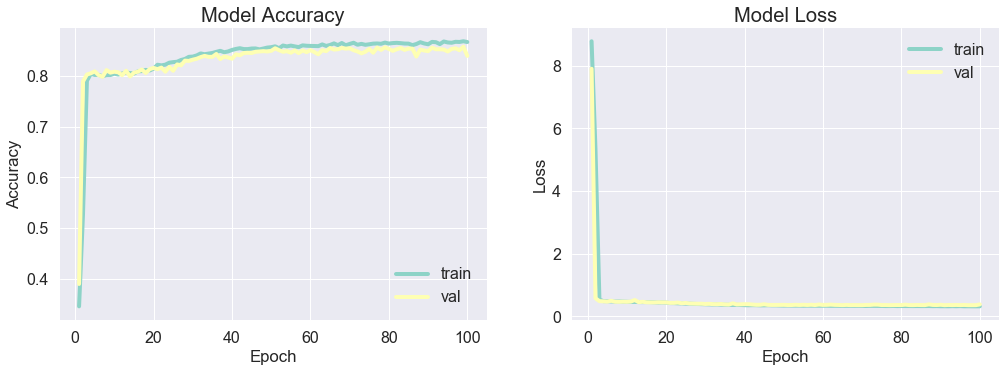

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 0s 73us/step - loss: 8.2901 - acc: 0.3548 - val_loss: 6.4029 - val_acc: 0.4444
Epoch 2/100
6400/6400 [==============================] - 0s 31us/step - loss: 1.9270 - acc: 0.7591 - val_loss: 2.0593 - val_acc: 0.7969
Epoch 3/100
6400/6400 [==============================] - 0s 30us/step - loss: 1.6322 - acc: 0.7795 - val_loss: 1.6051 - val_acc: 0.7969
Epoch 4/100
6400/6400 [==============================] - 0s 32us/step - loss: 1.4332 - acc: 0.7814 - val_loss: 1.4587 - val_acc: 0.7969
Epoch 5/100
6400/6400 [==============================] - 0s 26us/step - loss: 1.3152 - acc: 0.7672 - val_loss: 1.6912 - val_acc: 0.7969
Epoch 6/100
6400/6400 [==============================] - 0s 28us/step - loss: 1.3064 - acc: 0.7731 - val_loss: 0.9884 - val_acc: 0.8050
Epoch 7/100
6400/6400 [==============================] - 0s 31us/step - loss: 1.2433 - acc: 0.7802 - val_loss: 1.2779 - val_acc: 0.8000


6400/6400 [==============================] - 0s 31us/step - loss: 0.3653 - acc: 0.8527 - val_loss: 0.3706 - val_acc: 0.8525
Epoch 61/100
6400/6400 [==============================] - 0s 28us/step - loss: 0.3620 - acc: 0.8527 - val_loss: 0.3650 - val_acc: 0.8556
Epoch 62/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.3559 - acc: 0.8545 - val_loss: 0.3894 - val_acc: 0.8512
Epoch 63/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.3508 - acc: 0.8602 - val_loss: 0.3659 - val_acc: 0.8556
Epoch 64/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3550 - acc: 0.8573 - val_loss: 0.3619 - val_acc: 0.8594
Epoch 65/100
6400/6400 [==============================] - 0s 29us/step - loss: 0.3576 - acc: 0.8547 - val_loss: 0.3624 - val_acc: 0.8588
Epoch 66/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.3498 - acc: 0.8587 - val_loss: 0.3861 - val_acc: 0.8538
Epoch 67/100
6400/6400 [==============================

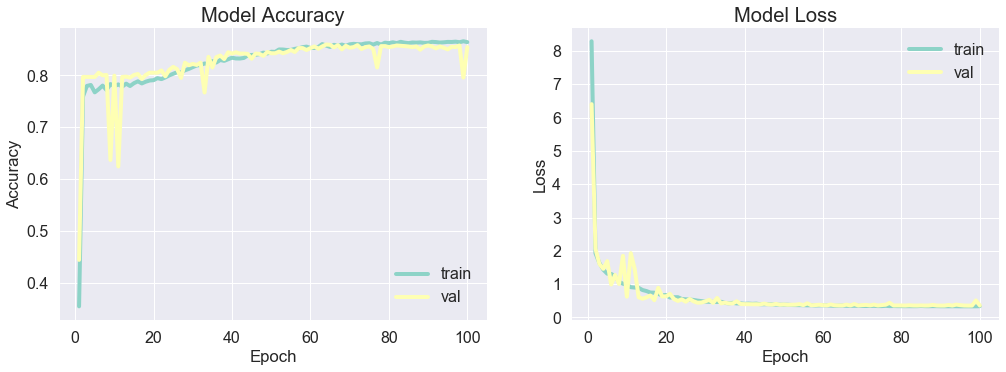

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 81us/step - loss: 9.1391 - acc: 0.3311 - val_loss: 8.3463 - val_acc: 0.3738
Epoch 2/100
6400/6400 [==============================] - 0s 29us/step - loss: 7.1283 - acc: 0.4330 - val_loss: 5.8757 - val_acc: 0.4900
Epoch 3/100
6400/6400 [==============================] - 0s 32us/step - loss: 1.9644 - acc: 0.6961 - val_loss: 0.5199 - val_acc: 0.8019
Epoch 4/100
6400/6400 [==============================] - 0s 29us/step - loss: 0.5103 - acc: 0.7961 - val_loss: 0.4913 - val_acc: 0.7950
Epoch 5/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.4912 - acc: 0.7991 - val_loss: 0.4950 - val_acc: 0.8037
Epoch 6/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4794 - acc: 0.8013 - val_loss: 0.5209 - val_acc: 0.7744
Epoch 7/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.4765 - acc: 0.7998 - val_loss: 0.4643 - val_acc: 0.8069


6400/6400 [==============================] - 0s 36us/step - loss: 0.3349 - acc: 0.8614 - val_loss: 0.3639 - val_acc: 0.8531
Epoch 61/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3329 - acc: 0.8627 - val_loss: 0.3655 - val_acc: 0.8544
Epoch 62/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.3360 - acc: 0.8647 - val_loss: 0.3555 - val_acc: 0.8569
Epoch 63/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.3331 - acc: 0.8619 - val_loss: 0.3593 - val_acc: 0.8519
Epoch 64/100
6400/6400 [==============================] - 0s 35us/step - loss: 0.3305 - acc: 0.8644 - val_loss: 0.3576 - val_acc: 0.8562
Epoch 65/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3322 - acc: 0.8656 - val_loss: 0.3536 - val_acc: 0.8575
Epoch 66/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3316 - acc: 0.8639 - val_loss: 0.3649 - val_acc: 0.8569
Epoch 67/100
6400/6400 [==============================

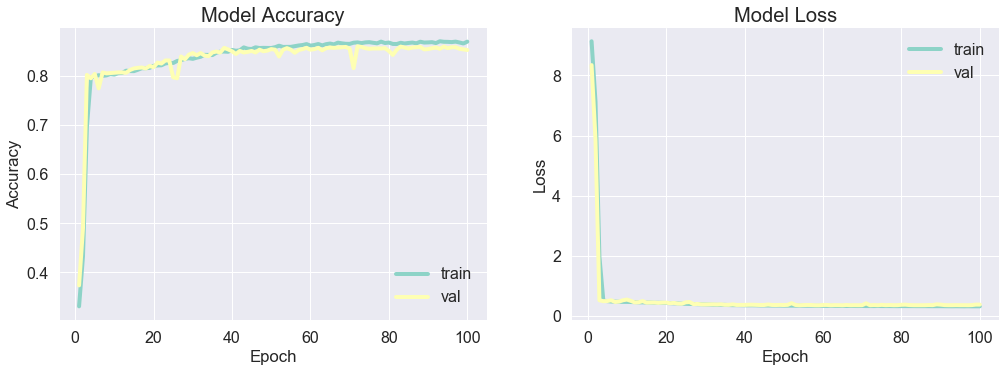

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 87us/step - loss: 7.7439 - acc: 0.3864 - val_loss: 5.4873 - val_acc: 0.4763
Epoch 2/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.7497 - acc: 0.7731 - val_loss: 0.4976 - val_acc: 0.7987
Epoch 3/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.4990 - acc: 0.7958 - val_loss: 0.4981 - val_acc: 0.7950
Epoch 4/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4892 - acc: 0.7984 - val_loss: 0.4811 - val_acc: 0.8013
Epoch 5/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4787 - acc: 0.8008 - val_loss: 0.4797 - val_acc: 0.8013
Epoch 6/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.4739 - acc: 0.8019 - val_loss: 0.4924 - val_acc: 0.8025
Epoch 7/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.4706 - acc: 0.8027 - val_loss: 0.4798 - val_acc: 0.8006


6400/6400 [==============================] - 0s 41us/step - loss: 0.4255 - acc: 0.8209 - val_loss: 0.4431 - val_acc: 0.8106
Epoch 61/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4251 - acc: 0.8214 - val_loss: 0.4389 - val_acc: 0.8119
Epoch 62/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4245 - acc: 0.8217 - val_loss: 0.4383 - val_acc: 0.8125
Epoch 63/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4235 - acc: 0.8212 - val_loss: 0.4402 - val_acc: 0.8094
Epoch 64/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4225 - acc: 0.8227 - val_loss: 0.4374 - val_acc: 0.8131
Epoch 65/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4223 - acc: 0.8222 - val_loss: 0.4369 - val_acc: 0.8125
Epoch 66/100
6400/6400 [==============================] - 0s 43us/step - loss: 0.4212 - acc: 0.8242 - val_loss: 0.4435 - val_acc: 0.8169
Epoch 67/100
6400/6400 [==============================

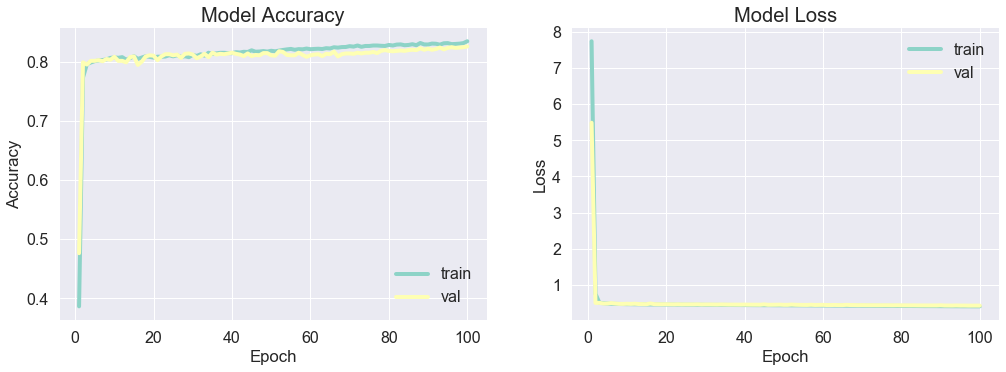

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 103us/step - loss: 9.0480 - acc: 0.3327 - val_loss: 7.7714 - val_acc: 0.3944
Epoch 2/100
6400/6400 [==============================] - 0s 37us/step - loss: 2.1893 - acc: 0.7100 - val_loss: 1.2508 - val_acc: 0.7969
Epoch 3/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.7763 - acc: 0.7756 - val_loss: 0.7658 - val_acc: 0.7319
Epoch 4/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.6077 - acc: 0.7847 - val_loss: 0.4837 - val_acc: 0.8025
Epoch 5/100
6400/6400 [==============================] - 0s 36us/step - loss: 0.5019 - acc: 0.7956 - val_loss: 0.5080 - val_acc: 0.8056
Epoch 6/100
6400/6400 [==============================] - 0s 35us/step - loss: 0.4896 - acc: 0.7984 - val_loss: 0.4652 - val_acc: 0.8125
Epoch 7/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.4779 - acc: 0.8009 - val_loss: 0.5001 - val_acc: 0.7856

6400/6400 [==============================] - 0s 34us/step - loss: 0.3425 - acc: 0.8586 - val_loss: 0.3751 - val_acc: 0.8394
Epoch 61/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.3436 - acc: 0.8586 - val_loss: 0.3809 - val_acc: 0.8450
Epoch 62/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3412 - acc: 0.8556 - val_loss: 0.3792 - val_acc: 0.8431
Epoch 63/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3396 - acc: 0.8572 - val_loss: 0.3787 - val_acc: 0.8475
Epoch 64/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3415 - acc: 0.8591 - val_loss: 0.3759 - val_acc: 0.8488
Epoch 65/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.3377 - acc: 0.8581 - val_loss: 0.3766 - val_acc: 0.8475
Epoch 66/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.3388 - acc: 0.8594 - val_loss: 0.3970 - val_acc: 0.8431
Epoch 67/100
6400/6400 [==============================

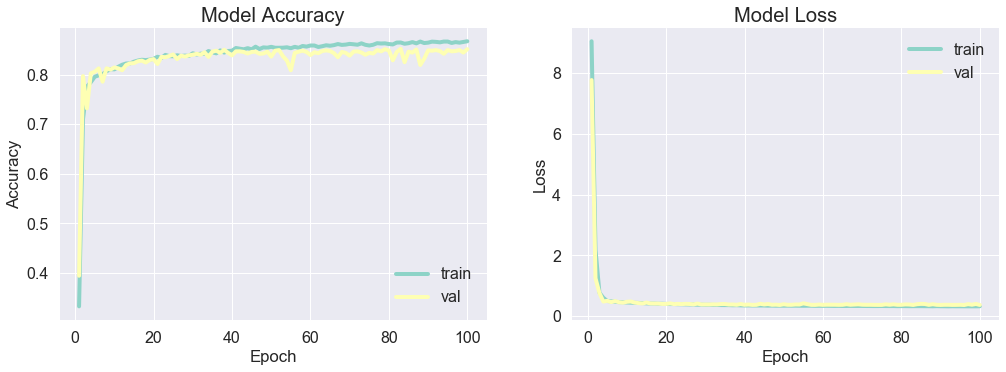

In [277]:
for optim in ["adam","sgd","RMSprop","Adagrad","Adadelta"]:
        clasi = simple_nn(optim = optim)
        plot_model_history(clasi)

### <u><i>Batch Size Experimentation</u></i>

In [278]:
def simple_nn_batch(batch = 10):
    
    classifier = Sequential()
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=11))
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    
    classifier.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier.fit(X_train, y_train, batch_size=batch, epochs=100, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 147us/step - loss: 4.9782 - acc: 0.5439 - val_loss: 0.5319 - val_acc: 0.7806
Epoch 2/100
6400/6400 [==============================] - 0s 76us/step - loss: 0.5770 - acc: 0.7864 - val_loss: 0.4990 - val_acc: 0.7856
Epoch 3/100
6400/6400 [==============================] - 1s 84us/step - loss: 0.4960 - acc: 0.7933 - val_loss: 0.5016 - val_acc: 0.7806
Epoch 4/100
6400/6400 [==============================] - 1s 83us/step - loss: 0.4790 - acc: 0.7998 - val_loss: 0.4757 - val_acc: 0.7956
Epoch 5/100
6400/6400 [==============================] - 0s 74us/step - loss: 0.4748 - acc: 0.8045 - val_loss: 0.4572 - val_acc: 0.8050
Epoch 6/100
6400/6400 [==============================] - 0s 68us/step - loss: 0.4676 - acc: 0.8072 - val_loss: 0.5348 - val_acc: 0.8050
Epoch 7/100
6400/6400 [==============================] - 0s 65us/step - loss: 0.4553 - acc: 0.8077 - val_loss: 0.4869 - val_acc: 0.8113

6400/6400 [==============================] - 0s 67us/step - loss: 0.3314 - acc: 0.8622 - val_loss: 0.3634 - val_acc: 0.8569
Epoch 61/100
6400/6400 [==============================] - 1s 93us/step - loss: 0.3303 - acc: 0.8641 - val_loss: 0.3770 - val_acc: 0.8544
Epoch 62/100
6400/6400 [==============================] - 1s 84us/step - loss: 0.3318 - acc: 0.8633 - val_loss: 0.3704 - val_acc: 0.8562
Epoch 63/100
6400/6400 [==============================] - 0s 61us/step - loss: 0.3275 - acc: 0.8666 - val_loss: 0.3668 - val_acc: 0.8550
Epoch 64/100
6400/6400 [==============================] - 0s 76us/step - loss: 0.3299 - acc: 0.8634 - val_loss: 0.3652 - val_acc: 0.8575
Epoch 65/100
6400/6400 [==============================] - 0s 61us/step - loss: 0.3284 - acc: 0.8667 - val_loss: 0.3603 - val_acc: 0.8556
Epoch 66/100
6400/6400 [==============================] - 0s 70us/step - loss: 0.3297 - acc: 0.8630 - val_loss: 0.3669 - val_acc: 0.8600
Epoch 67/100
6400/6400 [==============================

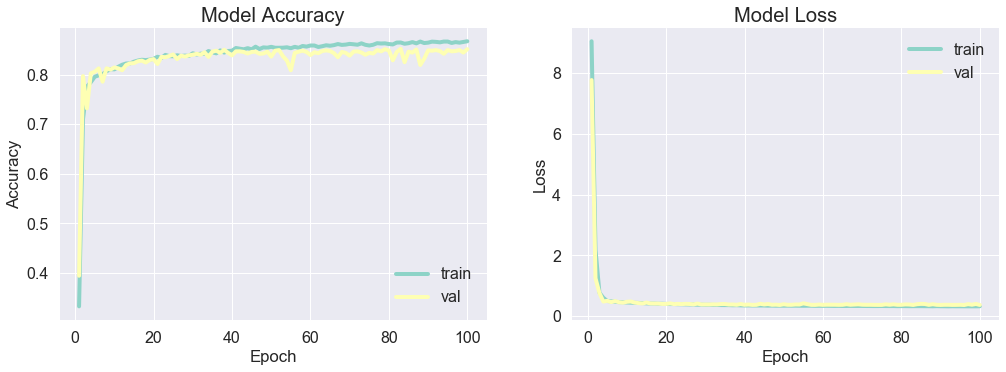

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 104us/step - loss: 7.1709 - acc: 0.4317 - val_loss: 2.3483 - val_acc: 0.5988
Epoch 2/100
6400/6400 [==============================] - 0s 32us/step - loss: 1.1371 - acc: 0.7631 - val_loss: 0.9310 - val_acc: 0.6981
Epoch 3/100
6400/6400 [==============================] - 0s 29us/step - loss: 0.6925 - acc: 0.7745 - val_loss: 0.5959 - val_acc: 0.8044
Epoch 4/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.5355 - acc: 0.7858 - val_loss: 0.4822 - val_acc: 0.7963
Epoch 5/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.4843 - acc: 0.7994 - val_loss: 0.4612 - val_acc: 0.8075
Epoch 6/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.4769 - acc: 0.8034 - val_loss: 0.4597 - val_acc: 0.8069
Epoch 7/100
6400/6400 [==============================] - 0s 36us/step - loss: 0.4710 - acc: 0.8042 - val_loss: 0.4543 - val_acc: 0.8081

6400/6400 [==============================] - 0s 41us/step - loss: 0.3408 - acc: 0.8586 - val_loss: 0.3784 - val_acc: 0.8519
Epoch 61/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.3355 - acc: 0.8641 - val_loss: 0.3680 - val_acc: 0.8456
Epoch 62/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3363 - acc: 0.8603 - val_loss: 0.3697 - val_acc: 0.8488
Epoch 63/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3360 - acc: 0.8591 - val_loss: 0.3661 - val_acc: 0.8538
Epoch 64/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.3388 - acc: 0.8592 - val_loss: 0.3734 - val_acc: 0.8500
Epoch 65/100
6400/6400 [==============================] - 0s 35us/step - loss: 0.3385 - acc: 0.8633 - val_loss: 0.3652 - val_acc: 0.8488
Epoch 66/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3383 - acc: 0.8575 - val_loss: 0.3747 - val_acc: 0.8488
Epoch 67/100
6400/6400 [==============================

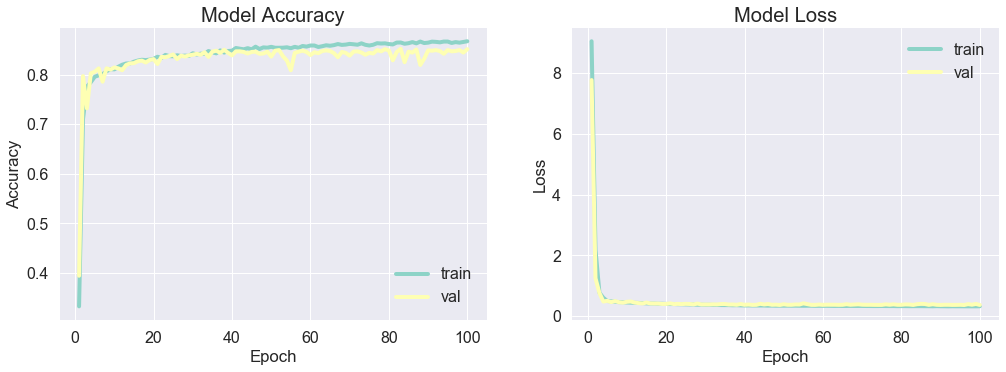

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 93us/step - loss: 9.4990 - acc: 0.3095 - val_loss: 8.9760 - val_acc: 0.3406
Epoch 2/100
6400/6400 [==============================] - 0s 23us/step - loss: 8.1333 - acc: 0.3762 - val_loss: 6.2649 - val_acc: 0.4537
Epoch 3/100
6400/6400 [==============================] - 0s 21us/step - loss: 1.5086 - acc: 0.7505 - val_loss: 0.6413 - val_acc: 0.7881
Epoch 4/100
6400/6400 [==============================] - 0s 16us/step - loss: 0.8916 - acc: 0.7728 - val_loss: 1.1635 - val_acc: 0.7956
Epoch 5/100
6400/6400 [==============================] - 0s 17us/step - loss: 0.7575 - acc: 0.7827 - val_loss: 0.5658 - val_acc: 0.7688
Epoch 6/100
6400/6400 [==============================] - 0s 16us/step - loss: 0.6300 - acc: 0.7861 - val_loss: 0.4879 - val_acc: 0.7975
Epoch 7/100
6400/6400 [==============================] - 0s 16us/step - loss: 0.5813 - acc: 0.7869 - val_loss: 0.4813 - val_acc: 0.8044


6400/6400 [==============================] - 0s 18us/step - loss: 0.3336 - acc: 0.8633 - val_loss: 0.3547 - val_acc: 0.8625
Epoch 61/100
6400/6400 [==============================] - 0s 16us/step - loss: 0.3383 - acc: 0.8614 - val_loss: 0.3540 - val_acc: 0.8631
Epoch 62/100
6400/6400 [==============================] - 0s 16us/step - loss: 0.3358 - acc: 0.8645 - val_loss: 0.3542 - val_acc: 0.8631
Epoch 63/100
6400/6400 [==============================] - 0s 20us/step - loss: 0.3360 - acc: 0.8606 - val_loss: 0.3536 - val_acc: 0.8619
Epoch 64/100
6400/6400 [==============================] - 0s 22us/step - loss: 0.3351 - acc: 0.8639 - val_loss: 0.3545 - val_acc: 0.8594
Epoch 65/100
6400/6400 [==============================] - 0s 18us/step - loss: 0.3329 - acc: 0.8623 - val_loss: 0.3598 - val_acc: 0.8569
Epoch 66/100
6400/6400 [==============================] - 0s 16us/step - loss: 0.3333 - acc: 0.8609 - val_loss: 0.3766 - val_acc: 0.8519
Epoch 67/100
6400/6400 [==============================

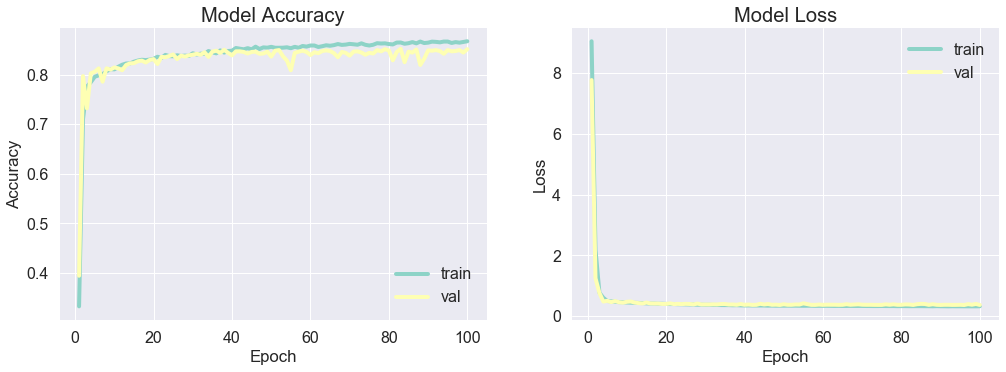

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 89us/step - loss: 9.0288 - acc: 0.3270 - val_loss: 8.6366 - val_acc: 0.3425
Epoch 2/100
6400/6400 [==============================] - 0s 8us/step - loss: 8.1061 - acc: 0.3741 - val_loss: 7.5766 - val_acc: 0.4019
Epoch 3/100
6400/6400 [==============================] - 0s 8us/step - loss: 5.5974 - acc: 0.5183 - val_loss: 3.9515 - val_acc: 0.5613
Epoch 4/100
6400/6400 [==============================] - 0s 8us/step - loss: 1.6384 - acc: 0.7605 - val_loss: 2.9131 - val_acc: 0.6006
Epoch 5/100
6400/6400 [==============================] - 0s 9us/step - loss: 1.2049 - acc: 0.7745 - val_loss: 1.0148 - val_acc: 0.8031
Epoch 6/100
6400/6400 [==============================] - 0s 8us/step - loss: 1.1166 - acc: 0.7764 - val_loss: 1.3332 - val_acc: 0.7994
Epoch 7/100
6400/6400 [==============================] - 0s 7us/step - loss: 0.9756 - acc: 0.7783 - val_loss: 0.9561 - val_acc: 0.8013
Epoch 

Epoch 61/100
6400/6400 [==============================] - 0s 7us/step - loss: 0.3606 - acc: 0.8514 - val_loss: 0.3974 - val_acc: 0.8356
Epoch 62/100
6400/6400 [==============================] - 0s 6us/step - loss: 0.3636 - acc: 0.8506 - val_loss: 0.3770 - val_acc: 0.8425
Epoch 63/100
6400/6400 [==============================] - 0s 7us/step - loss: 0.3625 - acc: 0.8502 - val_loss: 0.3730 - val_acc: 0.8506
Epoch 64/100
6400/6400 [==============================] - 0s 7us/step - loss: 0.3555 - acc: 0.8563 - val_loss: 0.3780 - val_acc: 0.8425
Epoch 65/100
6400/6400 [==============================] - 0s 7us/step - loss: 0.3576 - acc: 0.8527 - val_loss: 0.3833 - val_acc: 0.8406
Epoch 66/100
6400/6400 [==============================] - 0s 6us/step - loss: 0.3643 - acc: 0.8506 - val_loss: 0.3711 - val_acc: 0.8488
Epoch 67/100
6400/6400 [==============================] - 0s 6us/step - loss: 0.3532 - acc: 0.8578 - val_loss: 0.3706 - val_acc: 0.8488
Epoch 68/100
6400/6400 [========================

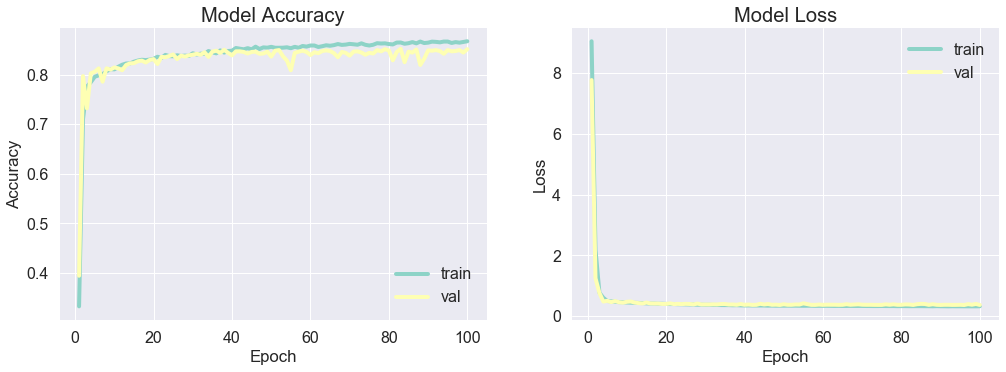

In [279]:
for i in [16,32,64,128]:
    classi = simple_nn_batch(batch= i)
    plot_model_history(clasi)

### <i><u>Loss Funtion</i></u>

In [280]:
def simple_nn_loss(loss = "categorical_crossentropy"):
    
    classifier = Sequential()
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=11))
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    
    classifier.compile(optimizer="adam", loss=loss, metrics=['accuracy'])
    
    return classifier.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 105us/step - loss: 0.6779 - acc: 0.3153 - val_loss: 0.6482 - val_acc: 0.3500
Epoch 2/100
6400/6400 [==============================] - 0s 26us/step - loss: 0.5156 - acc: 0.4683 - val_loss: 0.1919 - val_acc: 0.7969
Epoch 3/100
6400/6400 [==============================] - 0s 28us/step - loss: 0.1814 - acc: 0.7970 - val_loss: 0.1692 - val_acc: 0.8094
Epoch 4/100
6400/6400 [==============================] - 0s 24us/step - loss: 0.1673 - acc: 0.8022 - val_loss: 0.1594 - val_acc: 0.8169
Epoch 5/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.1633 - acc: 0.8045 - val_loss: 0.1558 - val_acc: 0.8156
Epoch 6/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.1614 - acc: 0.8028 - val_loss: 0.1682 - val_acc: 0.8075
Epoch 7/100
6400/6400 [==============================] - 0s 26us/step - loss: 0.1607 - acc: 0.8045 - val_loss: 0.1504 - val_acc: 0.8144

6400/6400 [==============================] - 0s 22us/step - loss: 0.1024 - acc: 0.8664 - val_loss: 0.1157 - val_acc: 0.8481
Epoch 61/100
6400/6400 [==============================] - 0s 23us/step - loss: 0.1018 - acc: 0.8669 - val_loss: 0.1121 - val_acc: 0.8519
Epoch 62/100
6400/6400 [==============================] - 0s 24us/step - loss: 0.1024 - acc: 0.8684 - val_loss: 0.1176 - val_acc: 0.8488
Epoch 63/100
6400/6400 [==============================] - 0s 22us/step - loss: 0.1035 - acc: 0.8631 - val_loss: 0.1139 - val_acc: 0.8481
Epoch 64/100
6400/6400 [==============================] - 0s 21us/step - loss: 0.1021 - acc: 0.8648 - val_loss: 0.1131 - val_acc: 0.8494
Epoch 65/100
6400/6400 [==============================] - 0s 22us/step - loss: 0.1028 - acc: 0.8648 - val_loss: 0.1149 - val_acc: 0.8500
Epoch 66/100
6400/6400 [==============================] - 0s 22us/step - loss: 0.1032 - acc: 0.8642 - val_loss: 0.1136 - val_acc: 0.8450
Epoch 67/100
6400/6400 [==============================

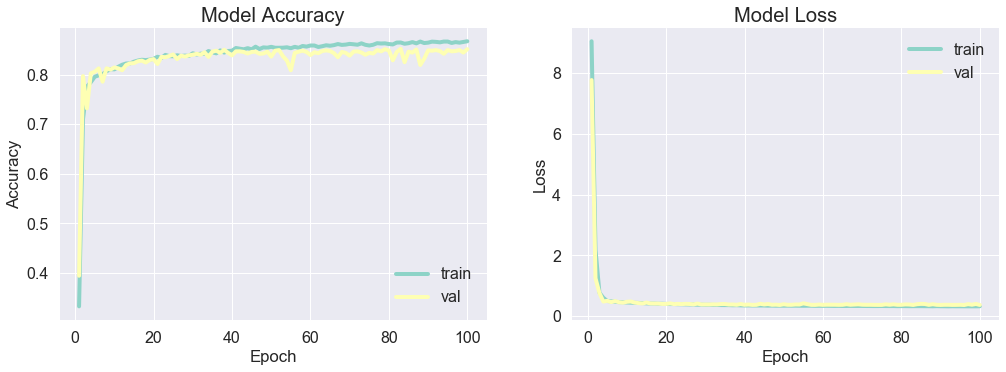

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 120us/step - loss: 8.6745 - acc: 0.3427 - val_loss: 7.6909 - val_acc: 0.4006
Epoch 2/100
6400/6400 [==============================] - 0s 30us/step - loss: 3.7233 - acc: 0.6070 - val_loss: 0.5077 - val_acc: 0.7981
Epoch 3/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.4985 - acc: 0.7991 - val_loss: 0.4842 - val_acc: 0.8044
Epoch 4/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.4809 - acc: 0.8013 - val_loss: 0.4755 - val_acc: 0.8037
Epoch 5/100
6400/6400 [==============================] - 0s 29us/step - loss: 0.4737 - acc: 0.8045 - val_loss: 0.4791 - val_acc: 0.7981
Epoch 6/100
6400/6400 [==============================] - 0s 27us/step - loss: 0.4657 - acc: 0.8047 - val_loss: 0.4618 - val_acc: 0.8106
Epoch 7/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4539 - acc: 0.8095 - val_loss: 0.4543 - val_acc: 0.8119

6400/6400 [==============================] - 0s 31us/step - loss: 0.3372 - acc: 0.8620 - val_loss: 0.3680 - val_acc: 0.8475
Epoch 61/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.3347 - acc: 0.8625 - val_loss: 0.3707 - val_acc: 0.8481
Epoch 62/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.3372 - acc: 0.8608 - val_loss: 0.3668 - val_acc: 0.8475
Epoch 63/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.3356 - acc: 0.8627 - val_loss: 0.3746 - val_acc: 0.8538
Epoch 64/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3369 - acc: 0.8602 - val_loss: 0.3668 - val_acc: 0.8531
Epoch 65/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.3350 - acc: 0.8627 - val_loss: 0.3609 - val_acc: 0.8531
Epoch 66/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.3330 - acc: 0.8641 - val_loss: 0.3606 - val_acc: 0.8531
Epoch 67/100
6400/6400 [==============================

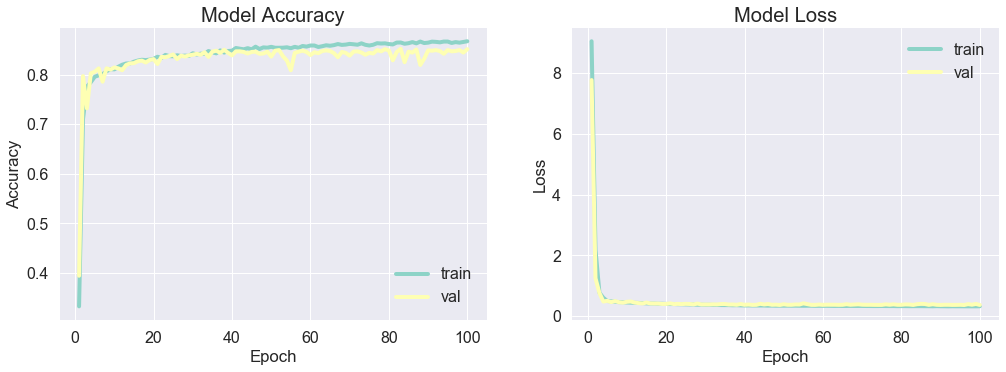

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 149us/step - loss: 0.6690 - acc: 0.3259 - val_loss: 0.6274 - val_acc: 0.3638
Epoch 2/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.4147 - acc: 0.5714 - val_loss: 0.1964 - val_acc: 0.7969
Epoch 3/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.1962 - acc: 0.7958 - val_loss: 0.1950 - val_acc: 0.7969
Epoch 4/100
6400/6400 [==============================] - 0s 30us/step - loss: 0.1926 - acc: 0.7950 - val_loss: 0.1793 - val_acc: 0.7975
Epoch 5/100
6400/6400 [==============================] - 0s 24us/step - loss: 0.1725 - acc: 0.7959 - val_loss: 0.1740 - val_acc: 0.8050
Epoch 6/100
6400/6400 [==============================] - 0s 28us/step - loss: 0.1667 - acc: 0.8038 - val_loss: 0.1611 - val_acc: 0.8056
Epoch 7/100
6400/6400 [==============================] - 0s 25us/step - loss: 0.1610 - acc: 0.8056 - val_loss: 0.1627 - val_acc: 0.8075

6400/6400 [==============================] - 0s 24us/step - loss: 0.1021 - acc: 0.8670 - val_loss: 0.1114 - val_acc: 0.8531
Epoch 61/100
6400/6400 [==============================] - 0s 23us/step - loss: 0.1008 - acc: 0.8703 - val_loss: 0.1142 - val_acc: 0.8456
Epoch 62/100
6400/6400 [==============================] - 0s 23us/step - loss: 0.1028 - acc: 0.8645 - val_loss: 0.1135 - val_acc: 0.8425
Epoch 63/100
6400/6400 [==============================] - 0s 23us/step - loss: 0.1020 - acc: 0.8684 - val_loss: 0.1139 - val_acc: 0.8494
Epoch 64/100
6400/6400 [==============================] - 0s 26us/step - loss: 0.1015 - acc: 0.8683 - val_loss: 0.1121 - val_acc: 0.8488
Epoch 65/100
6400/6400 [==============================] - 0s 26us/step - loss: 0.1006 - acc: 0.8706 - val_loss: 0.1132 - val_acc: 0.8481
Epoch 66/100
6400/6400 [==============================] - 0s 25us/step - loss: 0.1017 - acc: 0.8684 - val_loss: 0.1109 - val_acc: 0.8519
Epoch 67/100
6400/6400 [==============================

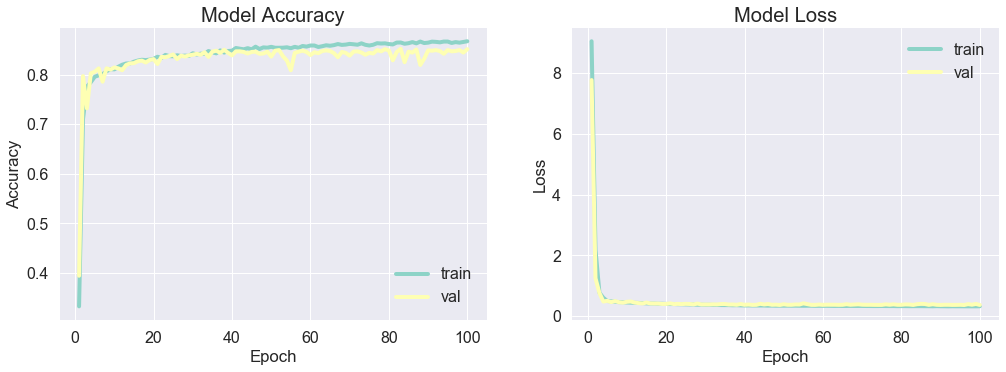

In [281]:
for loss in ['mean_squared_error',"binary_crossentropy","mean_squared_error"]:
    classi = simple_nn_loss(loss=loss )
    plot_model_history(clasi)

In [ ]:
# IMAGE Reference: https://www.livechatinc.com/wp-content/uploads/2016/04/customer-churn.jpg